# Лабораторная работа №1. Звуки и сигналы
## Упражнение 1.2
Скачаем с сайта <freesound.org> образец звука и исследуем его.
Был взят образец звука по ссылке: <https://freesound.org/people/SamplingSamTheMarylandMan/sounds/466741/>.

Перед началом работы качаем и импортируем библиотеку **thinkdsp**

In [23]:
import os
import sys
import wget
import matplotlib.pyplot as plt

if not os.path.exists('../thinkdsp.py'):
    wget.download('https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py')
sys.path.append('../')
import thinkdsp as dsp

wave = dsp.read_wave('./comin-as-you-are.wav')

После чего откроем аудио файл и выделим из него фрагмент длительностью пол секунды.

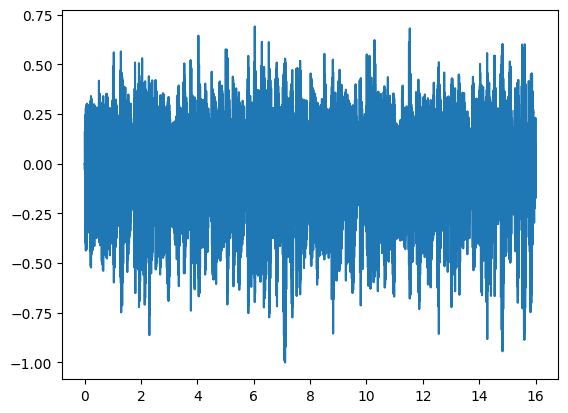

In [24]:
wave.plot()

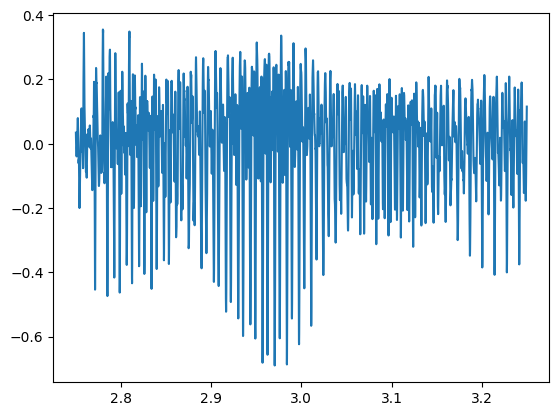

In [25]:
segment = wave.segment(start=2.75, duration=0.5)
segment.plot()

Проведем спектральный анализ выделенного фрагмента

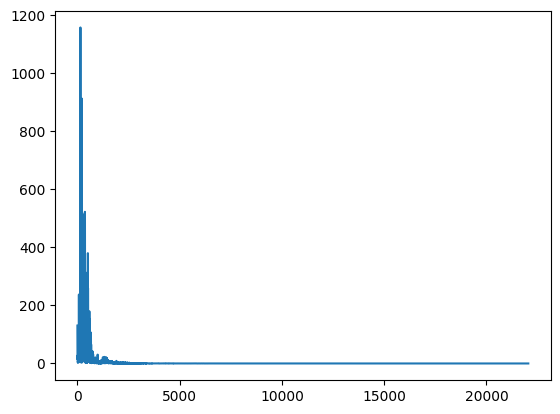

In [26]:
spectrum = segment.make_spectrum()
spectrum.plot()

Так как в выделенном фрагменте преобладают низкие и средние частоты звука, ограничим частоту при отрисовке графика
    до 800гц

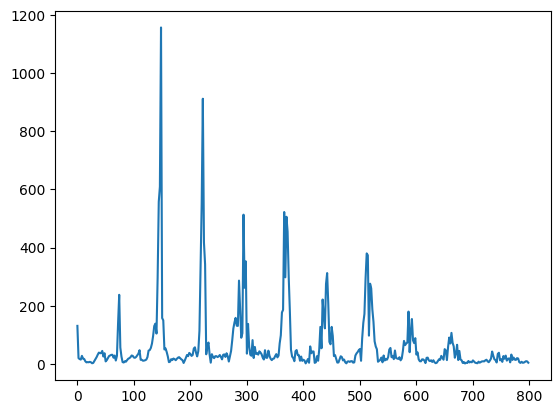

In [27]:
spectrum.plot(high=800)

Как видно из графика, основная частота примерно равна 150гц, что соответствует ноте D4(ре малой октавы).
    Используем функции high\_pass, low\_pass и band\_stop чтобы отфильтровать различные гармоники.

In [28]:
low_pass = segment.make_spectrum()
low_pass.low_pass(1500)
low_pass.make_wave().make_audio()

In [29]:
high_pass = segment.make_spectrum()
high_pass.high_pass(1500)
high_pass.make_wave().make_audio()

In [30]:
band_stop = segment.make_spectrum()
band_stop.band_stop(500,1000)
band_stop.make_wave().make_audio()

В результате вызова функции low\_pass звук стал намного более низким, функции high\_pass звук стал очень высоким и тихим,
    так как в данном диапазоне отсутствуют основные гармоники.

## Упражнение 1.3

Создадим сложный сигнал путем сложения синусоидального и косинусоидального сигналов

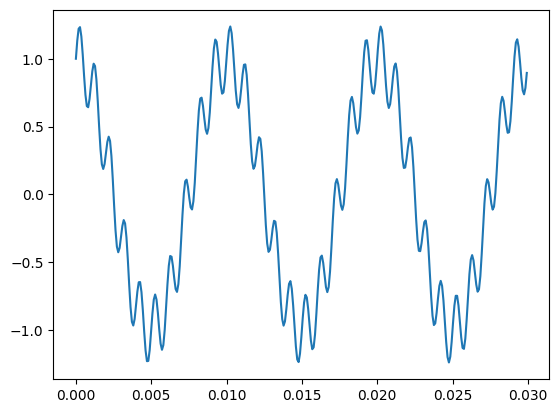

In [31]:
from thinkdsp import CosSignal, SinSignal

mix = CosSignal(freq=100, amp=1.0, offset=0) + \
    SinSignal(freq=1000, amp=0.25, offset=0)
mix.plot()
mix.make_wave().make_audio()

Разложим сигнал на частоты

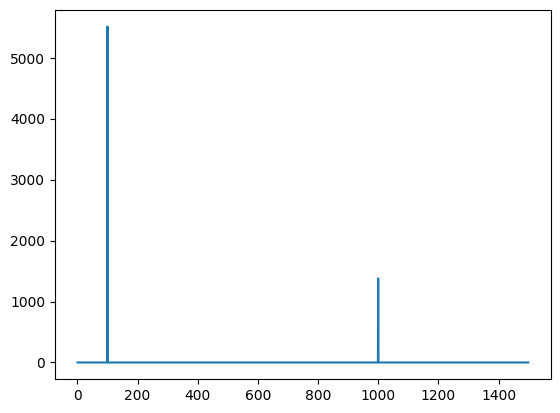

In [32]:
spectrum = mix.make_wave().make_spectrum()
spectrum.plot(high=1500)

Как и ожидалось, в сигнале присутствуют только две частоты: 100гц и 1000гц.

После добавления сигнала с частотой, не кратной основной, он отчетливо слышан на фоне остальных частот

In [33]:
mix += SinSignal(freq=333, amp=0.50, offset=0)
mix.make_wave().make_audio()

## Упражнение 1.4

Напишем функцию stretch, ускоряющую или замедляющую сигнал и протестируем данную функцию на звуковом файле из упражнения 1.2.

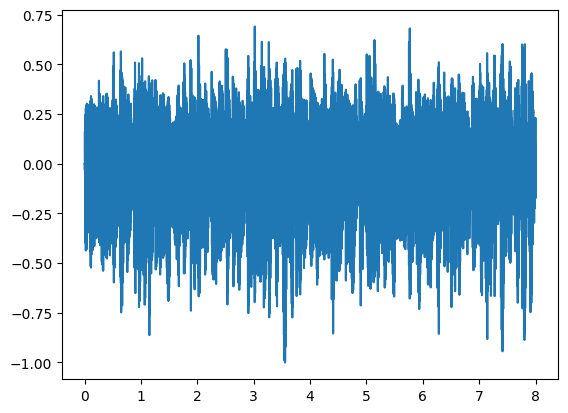

In [34]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

stretch(wave, 0.5)
wave.plot()

In [35]:
wave.make_audio()

Звук действительно ускорился в 2 раза, однако можно так же заметить, что частота сигнала тоже увеличилась в 2 раза,
    что заметно из спектрального разложения сигнала

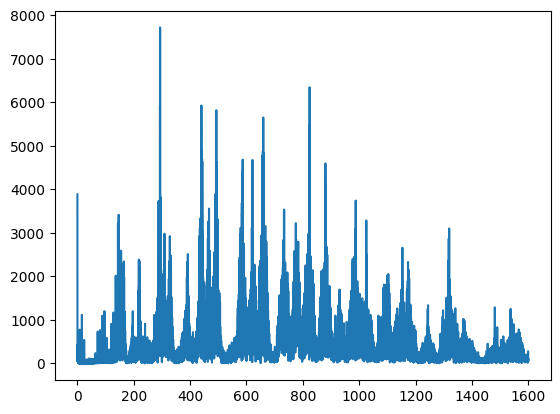

In [36]:
spec = wave.make_spectrum()
spec.plot(high=1600)